In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('master 2.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
df['lvl__gdp'] = df['gdp_per_capita ($)']
df['lvl__gdp'] = df['lvl__gdp'] - 9372
df['0'] = 0
df.loc[df["lvl__gdp"] > df["0"], "lvl_gdp"] = 1
df.loc[df["lvl__gdp"] < df["0"], "lvl_gdp"] = 0
df.loc[df["lvl__gdp"] == df["0"], "lvl_gdp"] = 1
df.__delitem__('0')
df.__delitem__('lvl__gdp')
df['GDP_for_group'] = df['population'] * df['gdp_per_capita ($)']
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,lvl_gdp,GDP_for_group
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,0.0,249068400
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,0.0,245168000
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,0.0,230601200
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0.0,17352800
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,0.0,218342800


In [7]:
df.shape

(27820, 14)

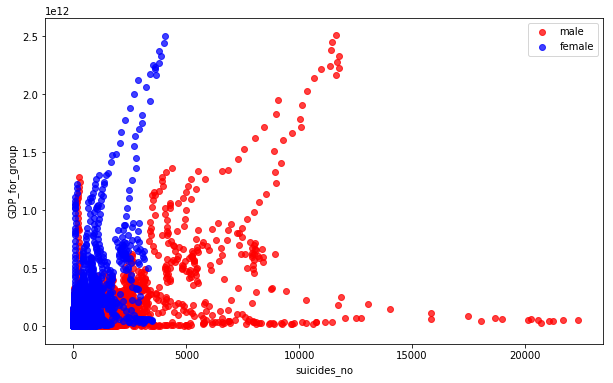

In [8]:
col1 = 'suicides_no'
col2 = 'GDP_for_group'

plt.figure(figsize=(10, 6))

plt.scatter(df[col1][df['sex'] == 'male'],
            df[col2][df['sex'] == 'male'],
            alpha=0.75,
            color='red',
            label='male')

plt.scatter(df[col1][df['sex'] == 'female'],
            df[col2][df['sex'] == 'female'],
            alpha=0.75,
            color='blue',
            label='female')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best');

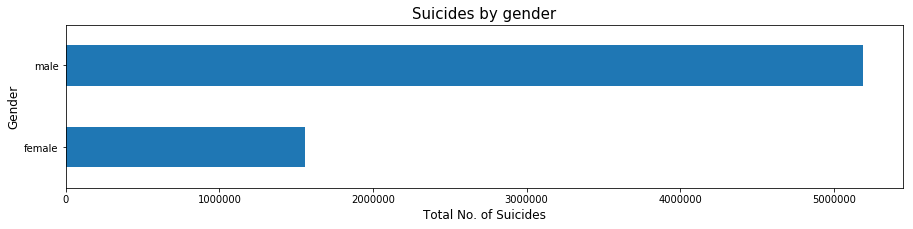

In [9]:
plt.subplots(figsize=(15,3))
df.groupby(['sex']).suicides_no.sum().plot('barh')
plt.xlabel('Total No. of Suicides', fontsize=12)
plt.ylabel('Gender', fontsize=12)
plt.title('Suicides by gender', fontsize=15)
plt.show()

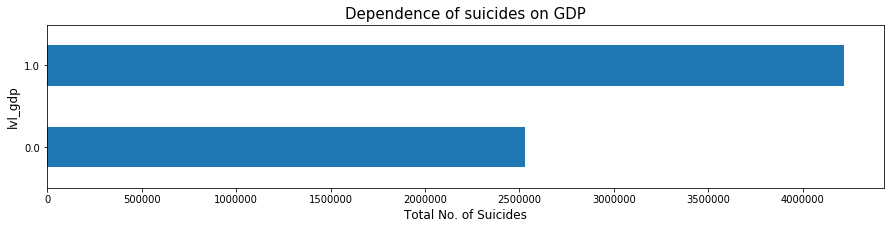

In [10]:
plt.subplots(figsize=(15,3))
df.groupby(['lvl_gdp']).suicides_no.sum().plot('barh')
plt.xlabel('Total No. of Suicides', fontsize=12)
plt.ylabel('lvl_gdp', fontsize=12)
plt.title('Dependence of suicides on GDP', fontsize=15)
plt.show()

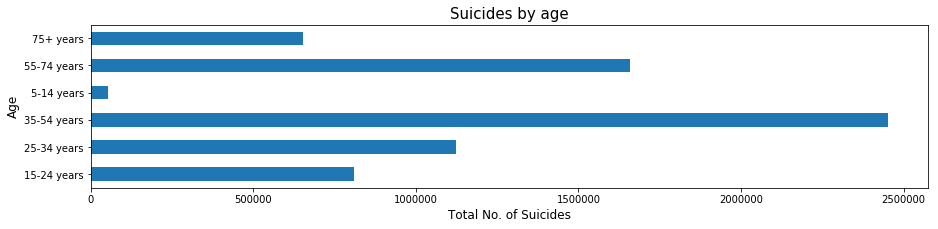

In [11]:
plt.subplots(figsize=(15,3))
df.groupby(['age']).suicides_no.sum().plot('barh')
plt.xlabel('Total No. of Suicides', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Suicides by age', fontsize=15)
plt.show()

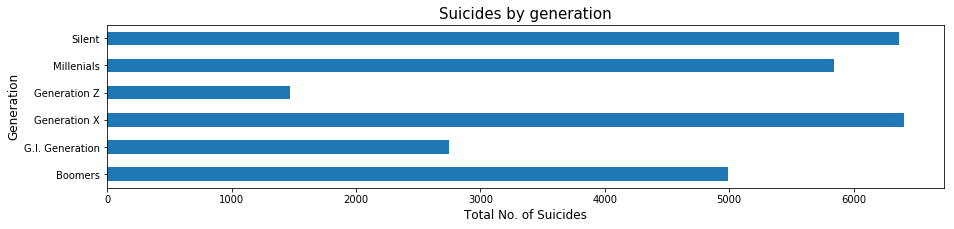

In [12]:
plt.subplots(figsize=(15,3))
df.groupby(['generation']).suicides_no.count().plot('barh')
plt.xlabel('Total No. of Suicides', fontsize=12)
plt.ylabel('Generation', fontsize=12)
plt.title('Suicides by generation', fontsize=15)
plt.show()

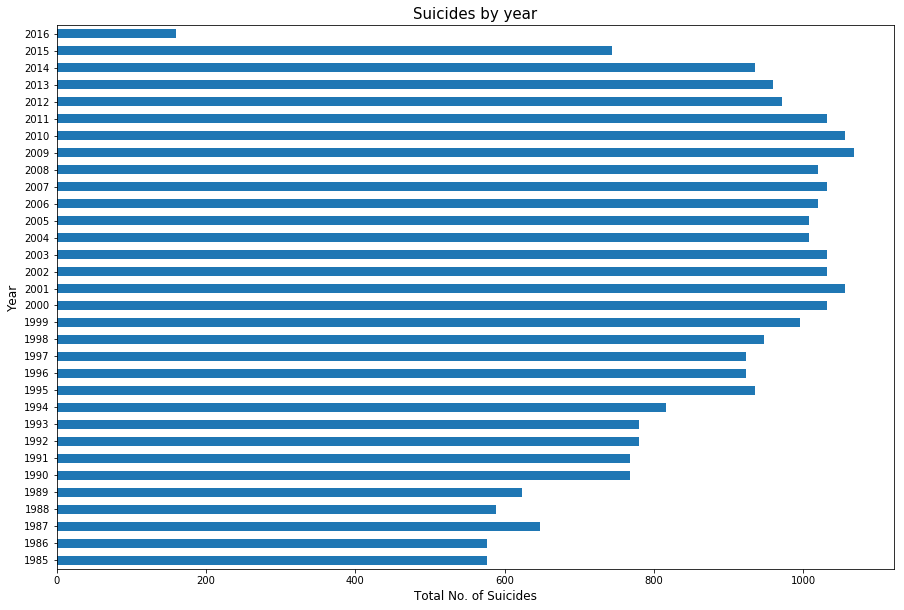

In [13]:
plt.subplots(figsize=(15,10))
df.groupby(['year']).suicides_no.count().plot('barh')
plt.xlabel('Total No. of Suicides', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.title('Suicides by year', fontsize=15)
plt.show()

/Users/vlad/PycharmProjects/untitled2/Neo/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


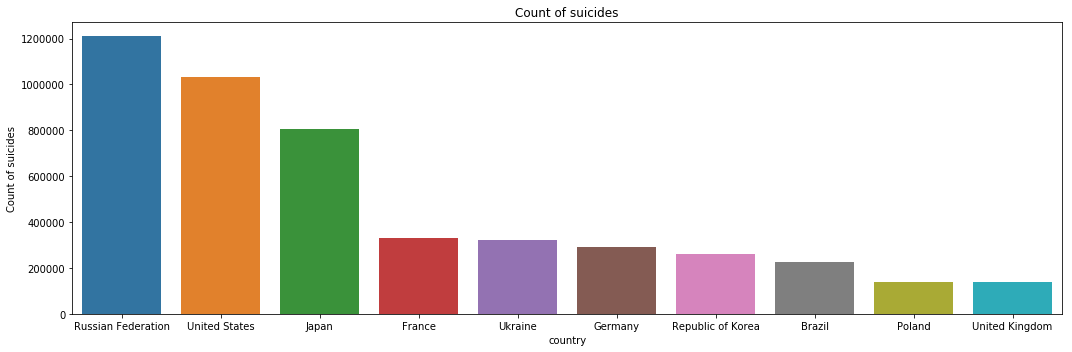

In [17]:
suic_sum = pd.DataFrame(df['suicides_no'].groupby(df['country']).sum())
suic_sum = suic_sum.reset_index().sort_index(by='suicides_no',ascending=False)
most_cont = suic_sum.head(10)
fig = plt.figure(figsize=(15,5))
plt.title('Count of suicides')
sns.barplot(y='suicides_no',x='country',data=most_cont)
plt.ylabel('Count of suicides')
plt.tight_layout()

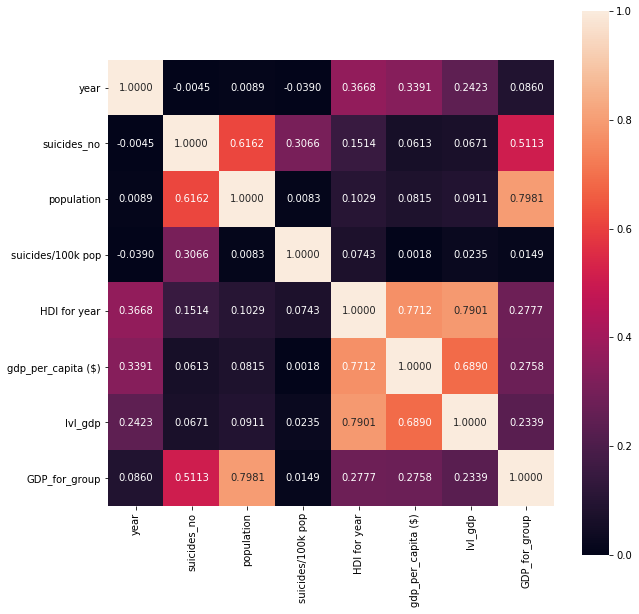

In [15]:
plt.subplots(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.4f', vmin=0, vmax=1, square=True);